In [20]:
import numpy as np
import pandas as pd

data = pd.read_csv('RandData1.csv')

df = pd.DataFrame(data)

df.head()

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,21,0,1,0,5,10000,8000,4200,2100,1100,...,2,0,0,1,1400,2900,500,10000,1000,5
1,21,0,0,0,1,8000,5800,3700,1900,1300,...,1,0,0,0,200,1900,400,10000,3000,4
2,21,0,0,0,4,9000,2500,800,1800,2800,...,1,1,0,1,500,3600,500,4000,3000,4
3,22,1,0,1,1,5000,3100,200,1200,2100,...,1,0,0,1,600,3500,2300,7000,2000,5
4,19,0,0,2,3,7000,3400,4400,1500,2300,...,0,1,1,1,200,2100,2400,4000,5000,4


In [21]:
#creating monthly savings column

data['Monthly Savings'] = data['Monthly pocketmoney'] - (
    data['Monthly exp on transport'] +
    data['Monthly exp on food'] +
    data['Monthly exp on education'] +
    data['Recurring monthly payments(Subscriptions, plans ,recharge etc.)'] +
    data['Expenses on fresh groceries and whole foods.'] +
    data['expenses on online takeout'] +
    data['expenditure on medicine'] +
    data['expenses on outings'] +
    data['tax payments']
)

In [22]:
# weights for financial health score

w1, w2, w3, w4, w5 = 0.3, 0.3, 0.2, 0.1, 0.1

# Calculate Financial Health Score
data['Financial Health Score'] = (w1 * data['Monthly pocketmoney'] +
                                  w2 * data['Monthly Savings'] -
                                  w3 * data['Debt'] +
                                  w4 * data['notable investments'] -
                                  w5 * (data['Monthly exp on transport'] +
                                        data['Monthly exp on food'] +
                                        data['Monthly exp on education'] +
                                        data['Recurring monthly payments(Subscriptions, plans ,recharge etc.)'] +
                                        data['Expenses on fresh groceries and whole foods.'] +
                                        data['expenses on online takeout'] +
                                        data['expenditure on medicine'] +
                                        data['expenses on outings'] +
                                        data['tax payments']))

In [23]:
# define features and target

features = data.drop('Financial Health Score', axis=1)
target = data['Financial Health Score']

In [24]:
data[['Monthly pocketmoney', 'Monthly Savings', 'Debt', 'notable investments', 'Financial Health Score']].head()

,Monthly pocketmoney,Monthly Savings,Debt,notable investments,Financial Health Score
0,10000,-21000,0,1100,-6290.0
1,8000,-20300,0,1300,-6390.0
2,9000,-8100,0,2800,-1160.0
3,5000,-16400,0,2100,-5350.0
4,7000,-16300,0,2300,-4890.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# splitting the dataset attributes into numeric and categoric data

numeric_features = ['Age', 'Monthly pocketmoney', 'Monthly exp on transport', 'Monthly exp on food', 
                    'Monthly exp on education', 'Debt', 'notable investments',
                    'Expenses on fresh groceries and whole foods.', 'expenses on online takeout', 
                    'expenditure on medicine', 'expenses on outings', 'tax payments']

categorical_features = ['Gender', 'Place of Stay', 'Relationship status',
                        'Financial goals', 'Do you follow a monthly budget ?', 'how often do u dine out?',
                        'how often do you make impulse purchases?', 
                        'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
                        'how comfortable are you with taking financial risk in your investments', 
                        'Do you use any mobile apps or online platforms to manage your finances and investments',
                        'what types of food do u spen money on']

In [27]:
# normalize all the data simeltaneously

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Combine preprocessing with the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=42))])

In [28]:
# apply train-test split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [29]:
# fitting model

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Monthly pocketmoney',
                                                   'Monthly exp on transport',
                                                   'Monthly exp on food',
                                                   'Monthly exp on education',
                                                   'Debt',
                                                   'notable investments',
                                                   'Expenses on fresh '
                                                   'groceries and whole foods.',
                                                   'expenses on online takeout',
                                                   'expenditure on medicine',
                                                   'expenses on outing...
                                                   'impulse purchases?',
                                                   'do you currently invest in '
                                                   'any financial products '
                                                   'like stocks,mutual funds '
                                                   'or cryptocurrencies',
                                                   'how comfortable are you '
                                                   'with taking financial risk '
                                                   'in your investments',
                                                   'Do you use any mobile apps '
                                                   'or online platforms to '
                                                   'manage your finances and '
                                                   'investments',
                                                   'what types of food do u '
                                                   'spen money on'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=500, random_state=42))])

In [30]:
#prediction of single values

y_pred = model.predict(X_test)

In [31]:
# model evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(929.2389999999999, 1428723.8689799998, 0.8230610808369913)

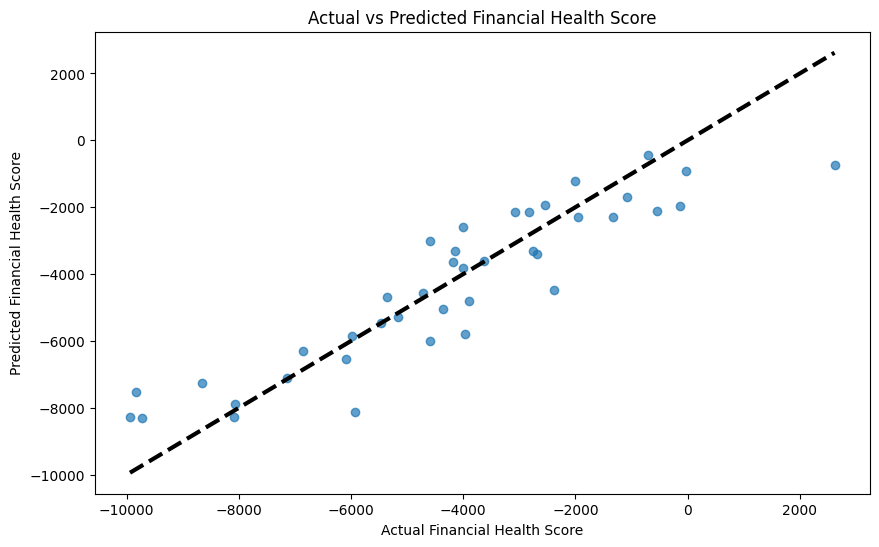

In [32]:
import matplotlib.pyplot as plt

# scatter plot of actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Financial Health Score')
plt.ylabel('Predicted Financial Health Score')
plt.title('Actual vs Predicted Financial Health Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()


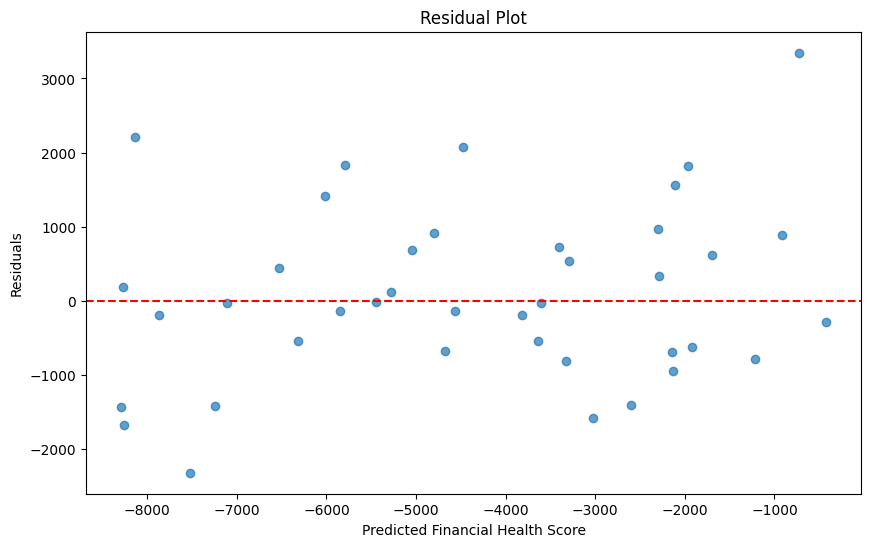

In [14]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Financial Health Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [33]:
import joblib

joblib.dump(model,'Financial_health.pkl')

['Financial_health.pkl']

In [34]:
model = joblib.load('Financial_health.pkl')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Monthly pocketmoney',
                                                   'Monthly exp on transport',
                                                   'Monthly exp on food',
                                                   'Monthly exp on education',
                                                   'Debt',
                                                   'notable investments',
                                                   'Expenses on fresh '
                                                   'groceries and whole foods.',
                                                   'expenses on online takeout',
                                                   'expenditure on medicine',
                                                   'expenses on outing...
                                                   'impulse purchases?',
                                                   'do you currently invest in '
                                                   'any financial products '
                                                   'like stocks,mutual funds '
                                                   'or cryptocurrencies',
                                                   'how comfortable are you '
                                                   'with taking financial risk '
                                                   'in your investments',
                                                   'Do you use any mobile apps '
                                                   'or online platforms to '
                                                   'manage your finances and '
                                                   'investments',
                                                   'what types of food do u '
                                                   'spen money on'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=500, random_state=42))])

In [18]:
pred = model.predict(X_test)
pred

array([-2300.1 , -7244.08, -4674.58, -7518.24, -8290.18, -5451.88,
       -3643.46, -2138.56, -1924.92, -6529.22, -6011.98, -7107.98,
       -2602.88, -2288.92, -4803.86, -3323.46, -3602.12, -3020.28,
       -6312.88, -3297.2 , -8272.86, -5274.34, -5792.26, -8135.16,
       -4471.32,  -918.1 , -1693.7 , -5847.9 , -2104.96, -2130.68,
       -3409.06, -5048.54, -8263.08, -7873.3 , -1962.9 ,  -727.64,
       -3815.26, -1215.62, -4564.68,  -426.54])

In [45]:
new_data_input = {
    'Age': [30],
    'Gender': [1],
    'Place of Stay': [0],
    'Relationship status': [0],
    'No of dependents': [2],
    'Monthly pocketmoney': [30000],
    'Monthly exp on transport': [200],
    'Monthly exp on food': [400],
    'Monthly exp on education': [3000],
    'notable investments': [150],
    'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100],
    'Debt': [200],
    'Monthly savings': [500],
    'Financial goals': [10000],
    'Do you follow a monthly budget ?': [0],
    'how often do u dine out?': [1],
    'how often do you make impulse purchases?': [1],
    'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1],
    'how comfortable are you with taking financial risk in your investments': [1],
    'Do you use any mobile apps or online platforms to manage your finances and investments': [1],
    'Expenses on fresh groceries and whole foods.': [150],
    'expenses on online takeout': [50],
    'expenditure on medicine': [20],
    'expenses on outings': [100],
    'tax payments': [500],
    'what types of food do u spen money on': [4]
}

print(new_data_input)


{'Age': [30], 'Gender': [1], 'Place of Stay': [0], 'Relationship status': [0], 'No of dependents': [2], 'Monthly pocketmoney': [30000000], 'Monthly exp on transport': [200], 'Monthly exp on food': [400], 'Monthly exp on education': [3000], 'notable investments': [150], 'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100], 'Debt': [200], 'Monthly savings': [500], 'Financial goals': [10000], 'Do you follow a monthly budget ?': [0], 'how often do u dine out?': [1], 'how often do you make impulse purchases?': [1], 'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1], 'how comfortable are you with taking financial risk in your investments': [1], 'Do you use any mobile apps or online platforms to manage your finances and investments': [1], 'Expenses on fresh groceries and whole foods.': [150], 'expenses on online takeout': [50], 'expenditure on medicine': [20], 'expenses on outings': [100], 'tax payments': [500], 'what type

In [46]:
new_data = pd.DataFrame(new_data_input)
new_data

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,30,1,0,0,2,30000000,200,400,3000,150,...,1,1,1,1,150,50,20,100,500,4


In [47]:
result = model.predict(new_data)
print("Predicted Financial Health : ",result)

Predicted Financial Health :  [144.06]


In [44]:
if result < 0:
    print("Poor Financial health")

elif result > 0 and result < 1000:
    print("Good Financial Health")

elif result>1000:
    print("Very good financial health")

Good Financial Health


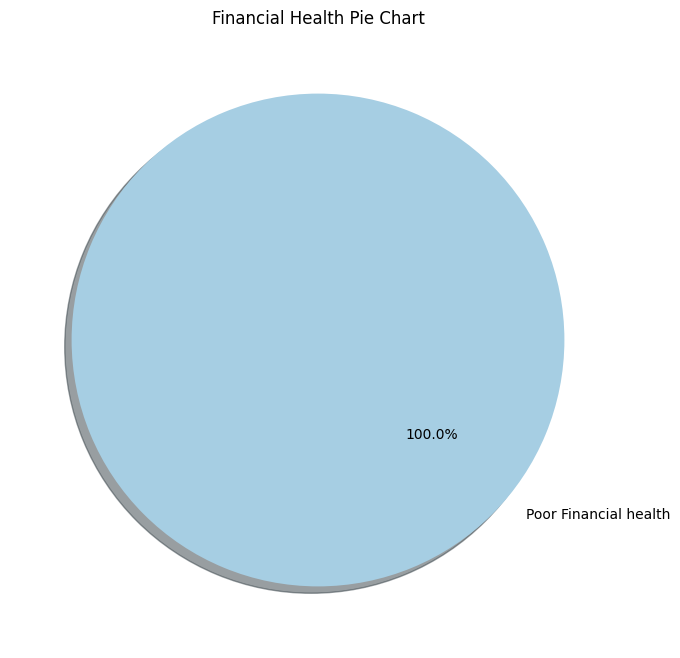